<a href="https://colab.research.google.com/github/orpazeilon/52414-lab-1-ektelat_alaa_and_eilon_orpaz/blob/master/lab_1_52568.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>lab 1 52568 </h1>


## **Getting started**

In [ ]:
import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames
from matplotlib import pyplot as plt

Loading elections 2020 elections data:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving votes per city 2020.csv to votes per city 2020 (1).csv


In [ ]:
import io
df_2020_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2020.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
# Dataset is now stored in a Pandas Dataframe
df_2020_raw.head()

,סמל ועדה,סמל ישוב,בזב,מצביעים,פסולים,כשרים,אמת,ג,ודעם,ז,זך,זץ,טב,י,יז,ינ,יף,יק,יר,כ,כן,ל,מחל,נ,נז,ני,נץ,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס,Unnamed: 37
שם ישוב,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
אבו גווייעד שבט,18,967,2018,595,6,589,13,0,554,0,0,0,0,0,1,0,0,0,0,0,1,1,4,0,1,0,0,0,8,2,0,0,0,0,2,2,NaN
אבו גוש,2,472,4821,2718,36,2682,75,4,2157,0,0,0,5,0,0,5,1,0,1,0,0,5,280,0,0,0,3,2,123,0,2,0,0,1,4,14,NaN
אבו סנאן,6,473,9422,6090,53,6037,92,6,4458,0,1,0,16,1,2,13,2,0,1,1,2,230,190,3,2,1,3,3,752,0,2,2,1,2,4,247,NaN
אבו עבדון שבט,18,958,142,41,1,40,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
אבו קורינאת שבט,18,968,3037,1336,8,1328,9,0,1263,0,0,0,1,0,0,3,0,0,1,0,0,0,8,0,1,2,1,0,33,0,2,1,0,2,1,0,NaN


## Q. 1


ביצענו היסטוגרמה של אחוז הקולות הפסולים בישוב על פני כל הישובים. 
ניתן לראות היסטוגרמה בעלת זנב ימני



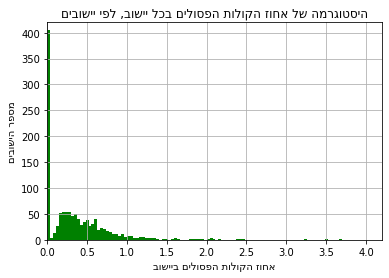

In [ ]:
df_2020 = df_2020_raw
df_2020['אחוז פסולים'] = df_2020['פסולים'] * 100 / df_2020['מצביעים'] 

# the histogram of the data
n, bins, patches = plt.hist(df_2020['אחוז פסולים'], 100, facecolor='g')
plt.title('םיבושיי יפל ,בושיי לכב םילוספה תולוקה זוחא לש המרגוטסיה')
plt.xlabel('בושייב םילוספה תולוקה זוחא')
plt.ylabel('םיבושיה רפסמ')
plt.axis([0, 4.2, 0, 420])
plt.grid(True)
plt.show()

cities with the largest precent of "קולות פסולים":

In [ ]:
df_2020.sort_values(by=['אחוז פסולים'], inplace=True, ascending=False)
df_2020.iloc[[0,1,2], [-1]]

,אחוז פסולים
שם ישוב,
מאיר שפיה,3.703704
עין ראפה,3.485255
כדיתה,3.225806


## Q. 2



In [ ]:
df_2020 = df_2020_raw[df_2020_raw.columns[6:-1]] # removing "metadata" columns
df_2020.head()

,אמת,ג,ודעם,ז,זך,זץ,טב,י,יז,ינ,יף,יק,יר,כ,כן,ל,מחל,נ,נז,ני,נץ,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס,Unnamed: 37
שם ישוב,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
מאיר שפיה,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,17,0,0,0,0,0,24,0,0,0,0,0,0,0,NaN
עין ראפה,16,3,308,0,0,0,2,0,0,0,0,0,0,0,0,5,3,0,0,0,0,0,23,0,0,0,0,0,0,0,NaN
כדיתה,7,6,0,0,0,0,3,0,0,0,0,0,0,0,0,0,25,2,0,0,0,0,16,0,0,0,0,0,0,1,NaN
תל יצחק,77,0,1,0,0,0,11,0,0,0,0,0,0,0,0,10,57,0,0,0,0,0,357,0,0,0,0,0,0,2,NaN
אבו עבדון שבט,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


Bar plot comparing 2 cities vote precentage, showing only values of parties above a certain threshold

In [ ]:
def compr_city_votes_bar(df, minshare, city1, city2):
    
  # first, make a list of parties which passed the minimum share (3.25%) of the primary vote. 
  par_vote_share = df.sum().div(df.sum().sum()).sort_values(ascending=False) 
  elect_threshold_par = par_vote_share[par_vote_share > minshare].keys()
  
  # for each city make a list of precentage vote
  city1_votes = df.loc[city1 ,elect_threshold_par] / df.loc[city1 ,elect_threshold_par].sum()
  city1_votes = city1_votes.tolist() 
  city2_votes = df.loc[city2 ,elect_threshold_par] / df.loc[city2 ,elect_threshold_par].sum()
  city2_votes = city2_votes.tolist() 

  # reverse hebrow letters of labels
  labels = [party[::-1] for party in elect_threshold_par]

  # bilding the plot
  fig, ax = plt.subplots()  # plt.subplots()
  width = 0.3  # set column width 
  city1_bar = ax.bar(np.arange(len(labels)) - width/2, list(city1_votes), width, color='b',  label=city1)
  city2_bar = ax.bar(np.arange(len(labels)) + width/2, list(city2_votes), width, color='r', label=city2)

  ax.set_ylabel('Votes percent')
  ax.set_xlabel('Parties Names')
  ax.set_title('Votes percent per party 2019')
  ax.set_xticks(np.arange(len(labels)))
  ax.set_xticklabels(labels)
  ax.legend((city1_bar[0], city2_bar[0]), (city1[::-1], city2[::-1]))
  plt.show()
  #return fig, ax 

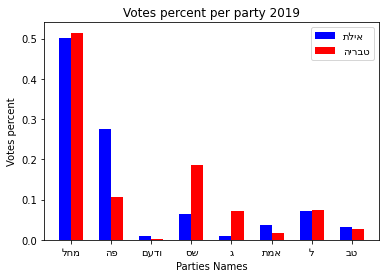

In [ ]:
compr_city_votes_bar(df_2020, 0.0325, 'אילת','טבריה')

הדומה בהצבעה בין אילת וטבריה הוא ריכוז גבוה של קולות למפלגת הליכוד וכן ריכוז נמוך של קולות לרשימה המשותפת, באילת נראה ריכוז יחסית גבוה של קולות גם לכחול לבן וריכוז נמוך של הצבעה לשס ולמפלגות החרדיות ואילו בטבריה להיפך.

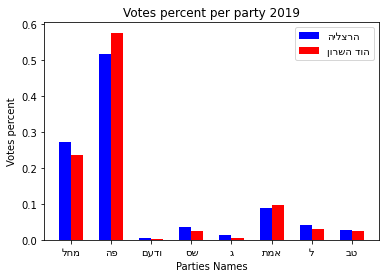

In [ ]:
compr_city_votes_bar(df_2020, 0.0325, 'הרצליה','הוד השרון')

הוד השרון והרצליה מאוד דומות בחלוקת הקולות בהן, השרון יש נטיה קלה לכחול לבן לעומת חלוקת הקולות בהרצליה

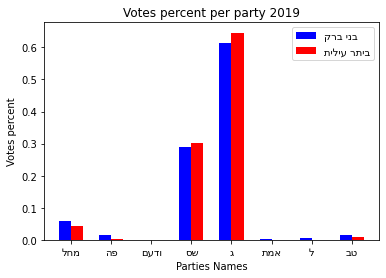

In [ ]:
compr_city_votes_bar(df_2020, 0.0325, 'בני ברק','ביתר עילית') 

בני ברק וביתר עלית דומות גם הן בחלקות הקולות בהן, ניתן לראות, כפי שהיינו מצפים מבחינה דמוגרפית שבבני ברק יש אחוזי הצבעה מעט יותר גבוהים לליכוד ואף לכחול לבן ושלביתר עלית יש יתרון על בני ברק באחוזי ההצבעה למפלגות החרדיות ובעיקר שס

## Q. 3



Bar plot comparing a given city vote share with total vote share in Israel state: 

In [ ]:
def israel_city_votes_share(df, city, minshare=0.0325):

  par_vote_share = df_2020.sum().div(df_2020.sum().sum()).sort_values(ascending=False) # list of vote share in the city 
  israel_vote_share = par_vote_share[par_vote_share > minshare] # only include parties above electoral threshold
  city_votes_share = df.loc[city ,israel_vote_share.keys()] / df.loc[city ,israel_vote_share.keys()].sum()   # list of vote share in the city 

  labels = [party[::-1] for party in israel_vote_share.keys()]   # reverse hebrow letters of labels

  # bilding the plot
  fig, ax = plt.subplots()  # plt.subplots()
  width = 0.3  # set column width 
  israel_bar = ax.bar(np.arange(len(labels)) - width/2, israel_vote_share, width, color='b',  label="Israel")
  city_bar = ax.bar(np.arange(len(labels)) + width/2, city_votes_share, width, color='r', label=city)

  ax.set_ylabel('Votes percent')
  ax.set_xlabel('Parties Names')
  ax.set_title('Votes percent per party 2019')
  ax.set_xticks(np.arange(len(labels)))
  ax.set_xticklabels(labels)
  ax.legend((israel_bar[0], city_bar[0]), ("לארשי", city[::-1]))
  plt.show()
  #return fig, ax 

the function "dist" resives 2 lists of vote precentage for parties of 2 cities. the lists are of the same length. 
the function coputes the diffrence of each party vote precentage between the cities, and sum it to get a scalar which is the "distance". 
"dist" function use the following formula: 
d(​p​,​q​) = (p​1​-q​1​)​^2​ + .... + (p​n​-q​n​)^2​  


In [ ]:
def dist(p,q): 
  # d(​p​,​q​) = (p​1​-q​1​)​^2​ + .... + (p​n​-q​n​)^2​  
  ans = 0 
  for i in range(len(p)): 
    ans += (p[i]-q[i])**2 
  return ans 

analizing every city vote share and save it in a dictionary:

In [ ]:
df_2020 = df_2020_raw[df_2020_raw.columns[6:-1]] # removing "metadata" columns
israel_vote_share = df_2020.sum().div(df_2020.sum().sum())
city_dict = {} 

for i in range(len(df_2020)): 
  city_i_vote_share = df_2020.iloc[[i]].sum().div(df_2020.iloc[[i]].sum().sum())
  city_dict[str(df_2020.index[i])] = dist(israel_vote_share,city_i_vote_share)

distance_from_israel = list(city_dict.values())
cities = list(city_dict.keys())

### Q . 3 . **a**

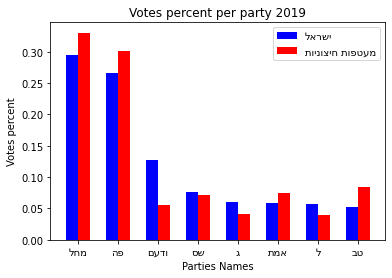

In [ ]:
seif_A = cities[distance_from_israel.index(min(distance_from_israel))] # the city which has the SMALLEST distance from israel parties share. 
israel_city_votes_share(df_2020 , str(seif_A))

המעטפות החיצוניות מורכבות מקולות של סטודנטים, בעלי מוגבלות ואסירים, אך בעיקר מקולות החיילים. בשל העובדה שבישראל הגיוס לצבא הוא מנדטורי והמשרתים בצבא מגיעים מכל היישובים והמגזרים, ניתן לשער כי התפלגות ההצבעות תהיה דומה להתפלגות בכלל הארץ. 

אך המטעפות החיצויניות אינן עיר בישראל, ולכן נעבור לעיר הבאה בעלת המרחק הריבועי הקטן ביותר מההתפלגות בכלל ישראל. 

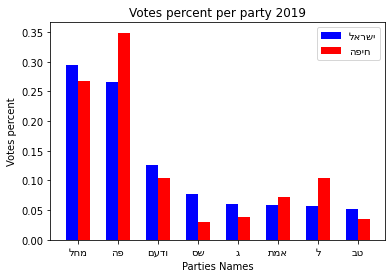

In [ ]:
city_dict.pop(seif_A)
distance_from_israel = list(city_dict.values())
cities = list(city_dict.keys()) 

seif_A_A = cities[distance_from_israel.index(min(distance_from_israel))] # the city which has the SMALLEST distance from israel parties share. 
israel_city_votes_share(df_2020 , str(seif_A_A))

### Q . 3 . **b**

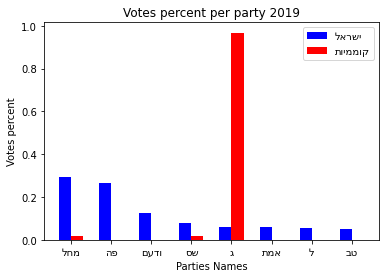

In [ ]:
seif_B = cities[distance_from_israel.index(max(distance_from_israel))] # the city which has the LARGEST distance from israel parties share.
israel_city_votes_share(df_2020 , seif_B)

קוממיות הינו מושב חרדי-חסידי. האוכלוסיה בו מתאפיינת בהומוגניות ואינה מייצגת את מגוון המגזרים הקיים במדינת ישראל. 